In [36]:
import pandas as pd
import numpy as np
import pylab as pl
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [92]:
affiliations = pd.read_csv("contactdbexport.csv") #SC-List.csv")

In [93]:
affiliations['Contact Category'] = affiliations['Contact Category'].map(lambda x:x.strip().lstrip())

In [94]:
affiliations.head()

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Ghaleb,Abdulla,abdulla1@llnl.gov,925-423-5947,Lawrence Livermore National Laboratory,Transients,Member,NaN,NaN,NaN,NaN,NaN,NaN
1,Paul Alexander,Abell,paul.a.abell@nasa.gov,281-483-0293,NASA Johnson Space Center,Solar System,Member,NaN,NaN,NaN,NaN,NaN,NaN
2,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Transients,Member,NaN,NaN,NaN,NaN,NaN,NaN
3,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Strong Lensing,Affiliate,NaN,NaN,NaN,NaN,NaN,NaN
4,Michel,Aguena,aguena@if.usp.br,NaN,NaN,DESC,Member,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
affiliations['Contact Category'].unique()

array(['Transients', 'Solar System', 'Strong Lensing', 'DESC', 'Galaxies',
       'AGN', 'Stars', 'Milky Way and Local Volume',
       'Statistics and Informatics'], dtype=object)

In [96]:
affiliations.shape

(1018, 13)

In [97]:
affiliations["Contact Category"] =\
    affiliations["Contact Category"].apply(lambda x:x.strip())

In [98]:
affiliations["Contact Category"].unique()

array(['Transients', 'Solar System', 'Strong Lensing', 'DESC', 'Galaxies',
       'AGN', 'Stars', 'Milky Way and Local Volume',
       'Statistics and Informatics'], dtype=object)

In [99]:
affiliations.drop_duplicates(subset=["First Name","Last Name","Contact Category"], inplace=True)
affiliations.shape

(991, 13)

In [100]:
(affiliations["Contact Category"] == 'DESC').sum()

169

In [101]:
affiliations.dropna(subset=["Contact Category"], inplace=True)
affiliations.describe()

,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
affiliations.ix[affiliations["Contact Category"] == 'Stars', "Contact Category"] = 'Stars, Milky Way, and Local Volume'
affiliations.ix[affiliations["Contact Category"] == 
             'Milky Way and Local Volume', "Contact Category"] = 'Stars, Milky Way, and Local Volume'

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
affiliations.ix[affiliations["Contact Category"] == 'Weak Lensing', "Contact Category"] = 'DESC'


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [104]:
affiliations.ix[affiliations["Contact Category"] == 'Supernovae', "Contact Category"] = 'DESC'

#affiliations = affiliations[~(
#        (affiliations["Contact Category"] == 'Weak Lensing') | 
#             (affiliations["Contact Category"] == 'Supernovae'))]
#affiliations.shape

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [105]:
(affiliations["Contact Category"] == 'DESC').sum()

169

In [143]:
affiliations.rename({'Transients':'Transients and Variable Star'}, axis=1, inplace=True)

In [144]:
for em in affiliations.Email.unique()[:1]:
    print (em) 
    print (affiliations[affiliations.Email == em]["Contact Category"])

abdulla1@llnl.gov
0    Transients
Name: Contact Category, dtype: object


In [145]:
scmatrix = np.zeros((affiliations["Contact Category"].unique().shape[0],
                     affiliations["Contact Category"].unique().shape[0]))
scmatrix.shape

(8, 8)

In [146]:
affiliations["Contact Category"].unique()

array(['Transients', 'Solar System', 'Strong Lensing', 'DESC', 'Galaxies',
       'AGN', 'Stars, Milky Way, and Local Volume',
       'Statistics and Informatics'], dtype=object)

In [147]:
scdic = {}
for i,sc in enumerate(affiliations["Contact Category"].unique()):
    scdic[sc] = i
    scmatrix[i,i] = len(affiliations[affiliations["Contact Category"] == 
                                     sc])

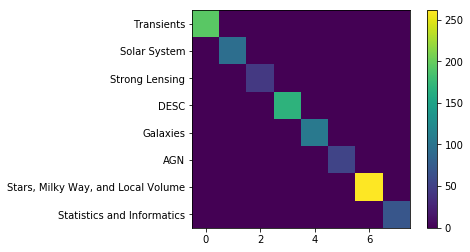

In [148]:
fig = pl.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(scmatrix)
ax.set_yticks(range(8))
ax.set_yticklabels(["%s"%s for s in affiliations["Contact Category"].unique()])#affiliations["Contact Category"].unique()
fig.colorbar(cax);

In [149]:
for sc in affiliations["Contact Category"].unique():
    print(affiliations[affiliations["Contact Category"] == sc].Email)

0                         abdulla1@llnl.gov
2                 agol@astro.washington.edu
5                 marcel@astro.columbia.edu
13                  javier.alonso@uantof.cl
17            anderson@astro.washington.edu
23              manuel.aravenaa@mail.udp.cl
25                david.ardila@jpl.nasa.gov
30                   pierre.astier@in2p3.fr
41      david.ballantyne@physics.gatech.edu
44                eabaltz@slac.stanford.edu
61                        kbechtol@lsst.org
67                       ericbell@umich.edu
74                   D.F.Bersier@ljmu.ac.uk
76                          fbianco@nyu.edu
79                       rbiswas4@gmail.com
81                       blanc@lal.in2p3.fr
84                        blazek.35@osu.edu
92                   bongard@lpnhe.in2p3.fr
101              jbosch@astro.princeton.edu
105                  botticella@na.astro.it
106                       boutigny@in2p3.fr
111                      niel@astro.psu.edu
116                   sarah@sara

In [150]:
for em in affiliations["Email"].unique():
    affhere = affiliations[affiliations["Email"] == em]
    if(affhere.shape[0] > 1):
        print(em)
        for pair in itertools.combinations(affhere["Contact Category"].values, 
                                      2):
            scmatrix[scdic[pair[0]], scdic[pair[1]]] += 1
            scmatrix[scdic[pair[1]], scdic[pair[0]]] = scmatrix[scdic[pair[0]], scdic[pair[1]]]

agol@astro.washington.edu
marcel@astro.columbia.edu
javier.alonso@uantof.cl
anderson@astro.washington.edu
tanguita@gmail.com
avestruz@uchicago.edu
bartlett@apc.univ-paris7.fr
becker@astro.washington.edu
fbianco@nyu.edu
sbonito@astropa.unipa.it
kirk.borne@gmail.com
jbosch@astro.princeton.edu
niel@astro.psu.edu
burchat@stanford.edu
mcatelan@astro.puc.cl
chartasg@cofc.edu
chernoff@astro.cornell.edu
cclaver@lsst.org
johann.cohen-tanugi@umontpellier.fr
ajc@astro.washington.edu
kcook@noao.edu
acooray@uci.edu
kevin.covey@wwu.edu
vpdebattista@gmail.com
digel@slac.stanford.edu
cdfassnacht@ucdavis.edu
ferguson@roe.ac.uk
giuliana.fiorentino@oabo.inaf.it
brendafrye@gmail.com
lluisgalbany@gmail.com
gawiser@physics.rutgers.edu
dgeisler@astroudec.cl
dkg@slac.stanford.edu
kglazebrook@swin.edu.au
dgold@berkeley.edu
agray@cc.gatech.edu
habib@anl.gov
slhawley@uw.edu
hebb@hws.edu
ivezic@uw.edu
matt.jarvis@astro.ox.ac.uk
jee.james@gmail.com
saurabh@physics.rutgers.edu
ljones.uw@gmail.com
skahn@lsst.org
kru

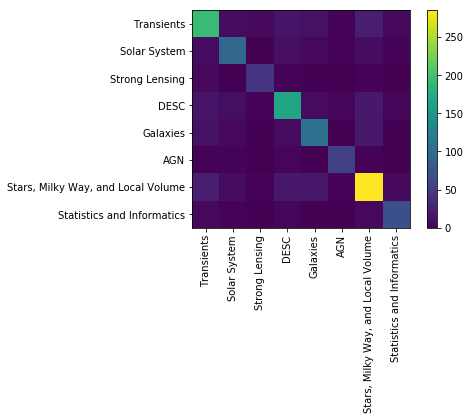

In [151]:
fig = pl.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(scmatrix)
ax.set_yticks(range(8))
ax.set_xticks(range(8))
ax.set_yticklabels(["%s"%s for s in affiliations["Contact Category"].unique()])#affiliations["Contact Category"].unique()
ax.set_xticklabels(["%s"%s for s in affiliations["Contact Category"].unique()], rotation=90)#affiliations["Contact Category"].unique()
fig.colorbar(cax);

In [195]:
foutaff = open("data/affiliations.csv", "w")
foutnums = open("data/affiliationsNumbers.csv", "w")
foutnums.write("subg,tot\n")
foutaff.write("word1,word2,count\n")
for i,sc1 in enumerate(scdic.keys()):
    for sc2 in scdic.keys():
        if sc1 == sc2:
            foutaff.write('"' + sc1 + '","' + sc1 +'",0\n')
            foutnums.write(sc1 + ',%d\n'%int(scmatrix[scdic[sc1], scdic[sc1]]))
        else:
            foutaff.write('"' + sc1 + '","' + sc2 +'",%d\n'%int(scmatrix[scdic[sc1], scdic[sc2]]))
foutnums.write("totalaff,%d\n"%len(affiliations))
foutnums.write("totalmem,%d\n"%len(affiliations["Email"].unique()))

13

In [196]:
foutaff.close()
foutnums.close()

In [220]:
affcount = affiliations["Contact Category"].value_counts()
affcount.rename({'Statistics and Informatics':'Informatics and\nStatistics'},  inplace=True)
affcount.rename({'Transients':'Transients and\nVariable Star'},  inplace=True)
affcount.rename({'Stars, Milky Way, and Local Volume':'Stars, Milky Way,\nand Local Volume'},  inplace=True)
len(affcount)

8

[Text(0, 241, '261'),
 Text(1, 174, '194'),
 Text(2, 149, '169'),
 Text(3, 86, '106'),
 Text(4, 74, '94'),
 Text(5, 50, '70'),
 Text(6, 34, '54'),
 Text(7, 23, '43')]

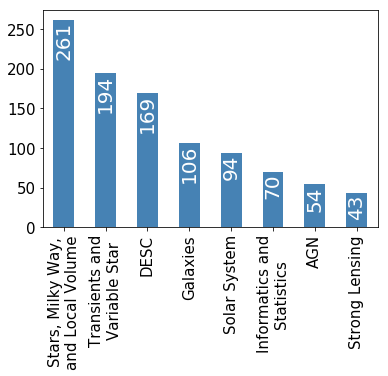

In [221]:
affcount.plot(kind='bar', fontsize=15, color='SteelBlue')
[pl.text(i, affcount[i]-20, affcount[i], rotation=90, color='w', 
         ha='center', fontsize=20) for i in range(len(affcount))]

In [222]:
affcount

Stars, Milky Way,\nand Local Volume    261
Transients and\nVariable Star          194
DESC                                   169
Galaxies                               106
Solar System                            94
Informatics and\nStatistics             70
AGN                                     54
Strong Lensing                          43
Name: Contact Category, dtype: int64

In [223]:
affcount['Transients and\nVariable Star'] = 222
affcount['Informatics and\nStatistics'] = 71
affcount['DESC'] = 215
affcount['Stars, Milky Way,\nand Local Volume'] = 140
affcount['Strong Lensing'] = 51

In [224]:
affcount.sort_index(inplace=True)

[Text(0, 34, '54'),
 Text(1, 195, '215'),
 Text(2, 86, '106'),
 Text(3, 51, '71'),
 Text(4, 74, '94'),
 Text(5, 120, '140'),
 Text(6, 31, '51'),
 Text(7, 202, '222')]

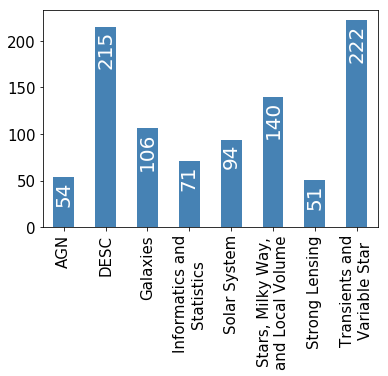

In [225]:
affcount.plot(kind='bar', fontsize=15, color='SteelBlue')
[pl.text(i, affcount[i]-20, affcount[i], rotation=90, color='w', 
         ha='center', fontsize=20) for i in range(len(affcount))]